<a href="https://colab.research.google.com/github/lovegohome/ML/blob/main/wLGM/1_ML_basicNpre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21.07.21 with 이경미 강사님


## 교육일정

7월 21(수) ~ 7월 29일(목)  + 향후 프로젝트 일정

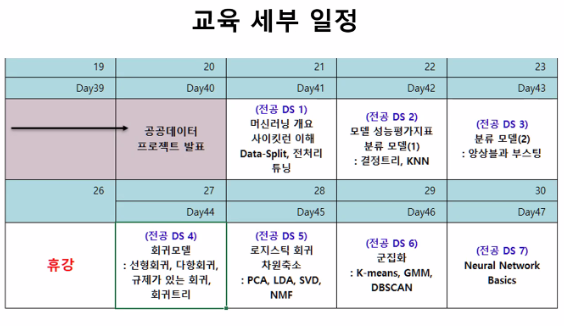

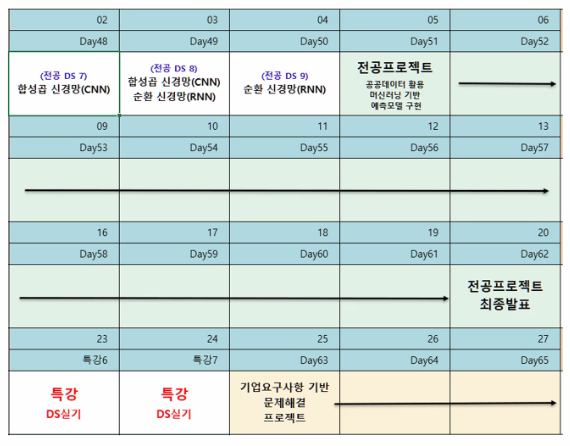

# 기계학습(ML) 개요
- 스스로 학습해가는 과정(알고리즘) = 기계학습
- Training Data를 사용하여 수학적 모델(모형) 생성 >> 예측 or 의사결정


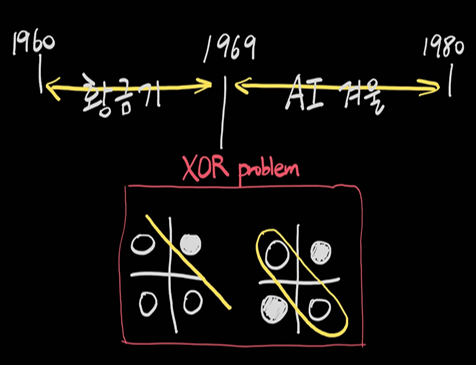

분류
- 왼쪽) 선형적인 분류: 선형함수 이용하는 알고리즘... perceptron
- 오른쪽) 비선형적인 분류... perceptron 불가능(혹한기)

머신러니의 주요 알고리즘
- 통계 기반 

# 실습1. 마켓과 머신러닝

## 생선 분류 문제
 - 마켓에 들어온 생선의 크기 정보를 입력하면 자동으로 생선이름 알려주기  
 
 - 도미에 대한 정보안다면? "30~40cm 길이의 생선은 도미"
  
 - 시스템이 스스로 기준을 찾으려면? 

### 도미 데이터 준비하기

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
len(bream_length)

35

 - 도미의 길이, 무게는 도미의 특징을 나타내는 특성(feature)라고 함
     - 통계학에서는 변수라고 부름     
     
 - 특성은 데이터를 표현하는 하나의 성질

### 도미 길이와 무게 데이터에 대한 산점도

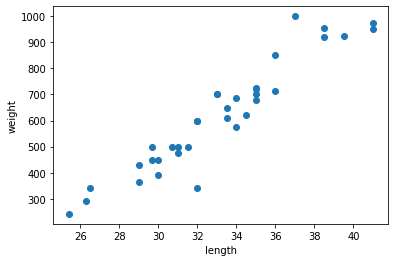

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 생선의 길이가 길수록 무게가 많이 나가는 모양 => 선형적 관계

### 빙어 데이터 준비하기

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

In [ ]:
len(smelt_length)

14

### 도미 데이터와 빙어 데이터 병합한 산점도

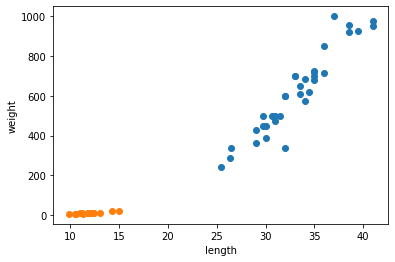

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

### 두 생선 데이터 

In [ ]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 2차원 리스트로 변환
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data[:3])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0]]


In [ ]:
len(fish_data)

49

### 타겟(레이블) 데이터 생성

In [ ]:
### Q
### A. 위에서 feature만 fish_data로 준 상황, 어떤 게 도미(35)이고 빙어(14)인지 
###    구분해주는 작업이고 y값을 주는 것임
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 이용한 분류

### K-최근접 이웃(K-Nearest Neighbor) 알고리즘 소개

- 테스트 데이터와 K개 훈련데이터의 y값들을 비교
- 분류와 회귀 모두 활용
    - 분류 : k개 최근접 이웃들의 class들 중 다수결 결과로 class 예측
    - 회귀 : k개 최근접 이웃들이 가지고 있는 값의 평균을 결과값으로 예측
    
![image.png](attachment:image.png)


- 비모수방식이며 instance-based 알고리즘


- train과 test 세트로 데이터를 분리하지만 실제로 train은 존재하지 않는 게으른 알고리즘


- 구체적인 데이터를 가지고 예측을 요청할 때, K개 가장 가까운 사례를 train data set에서 찾아 해당하는 데이터의 y 값을 기반으로 예측 결과를 제시


- K 값 : 동점을 막기 위해 대개 홀수로 정함 
    - k가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합 
        - k=1인 경우 가장 가까운 이웃과 같은 클래스가 할당됨
    - k가 크면 자료의 패턴을 파악할 수 없어 과소적합
        - k=N인 경우 전체 평균의 개념

![image-3.png](attachment:image-3.png)
https://imgur.com/6Ub8CXe

        
- '가깝다'는 판단 기준 : **거리** (맨하탄 거리, 유클리디안 거리, 민코위스키 거리 등)
    ![image-2.png](attachment:image-2.png)



### 사이킷런의 K-최근접이웃 클래스

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**KNeighborsClass 객체 생성**

In [ ]:
kn = KNeighborsClassifier()

**훈련(training) : fit(features, label) 메서드**

In [ ]:
### Q
### 위에서 만든 객체에 데이터를 적용(fit)하고 훈련을 할 거다: fit / 옷이 잘 맞나
kn.fit(fish_data, fish_target) 
# 데이터를 줄 때 반드시 두 가지를 구분해서 준다.
# 1st. 영향을 주는 feature 변수
# 2nd. 각각 도미인지 빙어인지 '정답' 변수, 타겟변수
# 이렇게 train 한 상태.
# 그러면 객체가 만들어 졌다고 객체 이름이 반환 됨.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**모델 평가 : score() 메서드 => 정확도**

In [ ]:
# 제대로 잘 적용이 됐는지 test함(정확도 계산)
# 성능이 좋은지 확인하는 지표: 분류-정확도 등, 회귀-MSE
kn.score(fish_data, fish_target)
# score 메서드에 데이터를 넣어주는 거다. train 한 게 성능이 얼마나 좋은지 
# 피쳐, 타겟 둘다. 100% 분류 했다는 뜻. 
# 기존 데이터로는 다 맞춘 상태. 이미 연습했으니깐.

1.0

**정확도(accuracy)**

- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸 값
-  $정확히 맞힌 개수 / 전체 데이터수$

### K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류

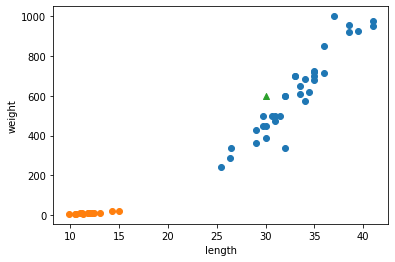

In [ ]:
# 기존 데이터에 새로운 데이터 들어가면 어떻게 분류를 잘 할 수 있는지가 궁금 

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 예측
kn.predict([[30,600], [10,3]])
# 2차원배열 형태로 줘야 함. frame을 하나만 주는 게 아님. 
# kn.predict([[30,600], [10,3], [5,20]]) 이런 상황을 위해 
# 분류 된 걸 확인 가능 
# 가장 가까운 이웃을 통해 분류 

# 위에서 fit으로 학습했던 결과들을 어딘가에 갖고 있는 것
# 관련 속성을 아래에서 나타내 보자 

array([1, 0])

**_fit_X  속성** : fish_data를 가지고 있음

X = features

In [ ]:
print(kn._fit_X[:10])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]]


**_y 속성** : fish_target 을 가지고 있음

In [ ]:
print(kn._y[:10])

[1 1 1 1 1 1 1 1 1 1]


**K-neighbors 크기 지정**

In [ ]:
print(kn.n_neighbors)
# n_neighbors 이걸 정해놓지 않았었음, 근데 그냥 나옴. 즉 default 값=5 있음
# 그걸 알려주는 속성 = n_neighbors

# k=n이면 전체 비중으로만 따라간다. 그래서 따로 정해줘야 해.

5


In [ ]:
# KNeighborsClass 객체 생성, 이번엔 kn49
# kn을 49개 갖고 한다. 
# n_neighbors = 속성 이름 

kn49 = KNeighborsClassifier(n_neighbors=49)
# 데이터 개수 전체로 줘본 상황
# KNeighbors에서 k 값을 정해주지 않은 상태에서 기본 값 = 5

**K=49인 경우 모델 훈련 및 성능**

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

**49개 중 도미가 35개 이므로 어떤 데이터를 넣어도 무조건 도미로 예측**

In [ ]:
# 0.7142857142857143 의 의미는?
# 전체 데이터(fish_data)의 크기가 49개인데, k=49로 준다는 건 
# 항상 전체 중에 무조건 도미(35)가 나와서 35/49의 값
print(35/49)
# 똑같은 값 나옴. 위의 성능은 
# 49개 중 도미가 35개 이므로 어떤 데이터를 넣어도 무조건 도미로 예측
# 잘못 예측된 것. 

0.7142857142857143


### 확인 문제

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for k in range(5, 50):
  # 최근접 이웃 개수 설정
  kn.n_neighbors = k
  # 점수 개산
  score = kn.score(fish_data, fish_target)
#  print('k = %d, score = %f' %(k, score))
  # 100% 정확도에 미치지 못하는 이웃 개수 출력
  if score < 1:
    print(k, score)
    break

# k가 커질수록 정확도가 떨어지게 됨 

18 0.9795918367346939


### [마무리]

- 특성
- k-최근접 이웃 알고리즘
- 정확도

### 핵심 패키지와 함수
**scikit-learn**

- KNeighborsClassifier()
- fit()
- predict()
- score()


# Data Split : 훈련 세트와 테스트 세트

In [ ]:
# 앞에서 score 1.0 나온 게 문제인 것, 왜냐면 훈련됐던 데이터로 다시 주니깐. 변경해서 주자.
fish_length = length
fish_weight = weight
# fish_data, fish_target 위에서 이미 작성 돼 있어서 pass
# fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
#  fish_target = [1]*35 + [0]*14
kn = KNeighborsClassifier()

**훈련 데이터셋과 테스트 데이터셋으로 분리**

In [ ]:
train_input = fish_data[:35] #0~34
train_target = fish_target[:35]

# 검증용 데이터로 얼마나 잘 됐는지 test할 거니깐, test_data set
test_input = fish_data[35:] #35~
test_target = fish_target[35:]

**학습 및 평가**

In [ ]:
kn.fit(train_input, train_target) 
kn.score(test_input, test_target)
# 성능이 0 나옴, 왜? 
# 확인해 보면 알 수 있음

0.0

In [ ]:
print(fish_target[:35])
print(train_target[:35])
# 다 1, 즉 다 도미인 것
print(test_target[:35])
# 다 0, 즉 다 빙어인 것

# 훈련은 도미로 해놓고, 새로운 데이터로 테스트 돌리는데 다 빙어니깐 안들어가서 
# SCORE = 0 

# 따라서 훈련데이터, 테스트데이터로 나눈 걸로 끝내는 게 아니라
# 적절히 0,1 섞여있는 채로 훈련

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 올바른 훈련데이터와 테스트데이터 구성하기

In [ ]:
import numpy as np

In [ ]:
# fish_data를 array로 바꾸는 것, 안바꿔도 되는데 편리하게 쓰기 위해  
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)

In [ ]:
input_arr.shape

(49, 2)

### 데이터 섞기(shuffling)

In [ ]:
# index 활용할 거라 array 취한 것 
np.random.seed(42)
# 42개를 기준으로 난수를 발생시킴 

index = np.arange(49)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [ ]:
# 섞기
np.random.shuffle(index)
print(index)

[29 39 47 42  7 10 24 20 12 13 46 11 38 21 16 17 30  1 34 36  9 33 43 48
  3  6 22 18 19 35  4 28 41  5 23 27 14 44 37 40  8  2 25 26 32 15 45  0
 31]


In [ ]:
input_arr[[1,3]]
#1행과 2행, 인덱스에 해당하는 것만 갖고 옴 

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [ ]:
# 섞인 인덱스에서 0~34번째까지 
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
print(input_arr[index[0]])

[  37. 1000.]


In [ ]:
print(input_arr[29], train_input[0])

[  37. 1000.] [  37. 1000.]


In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

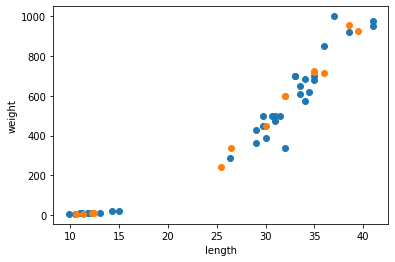

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# train과 test가 섞인 거 알 수 있음 
# train = 파란 색, test = 오렌지 색

## 두 번째 머신러닝 프로그램

In [ ]:
kn.fit(train_input, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kn.score(test_input, test_target)
# 새로운 데이터 넣었는데도 1.0 나옴. 잘 나옴. 100% 다 맞춘 것
# 그래도 여기서 갖고 놀았던 데이터 말고도 진짜 new 데이터 들어가도 맞추는지 보자

1.0

In [ ]:
print(test_input)

[[ 36.  714. ]
 [ 32.  600. ]
 [ 12.2  12.2]
 [ 10.6   7. ]
 [ 11.3   8.7]
 [ 30.  450. ]
 [ 26.5 340. ]
 [ 35.  725. ]
 [ 35.  720. ]
 [ 39.5 925. ]
 [ 32.  600. ]
 [ 12.4  13.4]
 [ 25.4 242. ]
 [ 38.5 955. ]]


In [ ]:
# 예측

kn.predict(test_input)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
print(test_target)
test_target

[1 1 0 0 0 1 1 1 1 1 1 0 1 1]


array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

# 데이터 전처리

## 넘파이로 데이터 준비하기

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

**두 리스트 열방향으로 합치기: 2차원 배열로**

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
# 열 옆에 쌓아간다 (행일 같을 때), 단 tuple 형태로
# key를 줘서 합치는 건? merge 

In [ ]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


**라벨 데이터**

In [ ]:
# 열 방향으로 합치는 다른 방법: concatenate, 단 tuple 형태로
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 도미, 빙어
# concatenate는 뒤에 인수를 쓰게 돼 있다. 그런데 안쓰면 행으로 붙음
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 데이터와 테스트 데이터 나누기

**train_test_split(매개변수들)**
- *array : feature dataset, label dataset 
- test_size = None 
- train_size = None
- shuffle = True
- stratify = None
- random_state = None

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)
#매개변수로 주기, numpy의 배열형태로 주어진 걸 준 상태
# x, y 주고 / xxyy로 출력 - return
# random_state: 강사님과 같이 랜덤하게 나오도록 하기 위해, seed값 주듯

In [ ]:
train_input.shape

(36, 2)

In [ ]:
test_input.shape

(13, 2)

In [ ]:
train_target.shape

(36,)

In [ ]:
test_target.shape

(13,)

In [ ]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      stratify=fish_target,
                                                                      random_state = 42)

In [ ]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

## 성능 평가 및 테스트

In [ ]:
############# 여기부터 다시 손코딩 해보자, 시간 없어서 복붙함 
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


**테스트할 도미 데이터를 포함한 산점도**

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**테스트할 도미데이터와 이웃하는 데이터들**